In [94]:
%matplotlib inline
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, Subset, Dataset
from sklearn.model_selection import train_test_split, KFold
from PIL import Image
import shutil
import pandas
from torchvision.io import read_image

cudnn.benchmark = True
plt.ion()   # interactive mode
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [95]:
def test_model(model, dataset, labels):
    since = time.time()

    # Each epoch has a training and validation phase
    #model.eval()

    running_corrects = 0
    prediction_array = np.zeros(0, dtype=object)
    prediction_numbers = np.zeros(0,)

    # Iterate over data.
    for idx in range(len(labels)):
        
        image = Image.fromarray(dataset[:, :, idx]).resize((320, 320))
        plt.figure()
        plt.imshow(image)
        plt.show()

        label = labels[idx]
        print("Label: ", label)
        
        # forward
        output = model(image, size=320)
        print(output.pandas().xyxy[0].sort_values('xmin'))
        predictions = output.pandas().xyxy[0].sort_values('xmin').loc[:, "class"].tolist()
        predictions_char_arr = [str(prediction) if prediction != 10 else 'u' for prediction in predictions]
        predictions_str = "".join(predictions_char_arr)
        print("Number of predictions: ", len(predictions_str), "Prediction: ", predictions_str)
        prediction_array = np.append(prediction_array, predictions_str)
        prediction_numbers = np.append(prediction_numbers, len(predictions_str))
        if len(predictions_str) == len(label):
            for i in range(len(label)):
                running_corrects += (label[i] == predictions_str[i])
        
    #loss = running_loss / dataset_test_size
    acc = running_corrects / np.sum(prediction_numbers)

    print(f'Acc: {acc:.4f}')

    time_elapsed = time.time() - since
    print(f'Testing complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    return model, prediction_array, prediction_numbers

In [96]:
dataset = np.load('dataset_merge.npy')
labels = np.load('labels_merge.npy', allow_pickle=True)
model_ft = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\justin.rossiter/.cache\torch\hub\master.zip
requirements: YOLOv5 requirements "gitpython" "tqdm>=4.64.0" not found, attempting AutoUpdate...
requirements:  Command 'pip install "gitpython" "tqdm>=4.64.0"  ' returned non-zero exit status 1.
YOLOv5  2022-12-7 Python-3.8.8 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 157 layers, 7039792 parameters, 0 gradients
Adding AutoShape... 


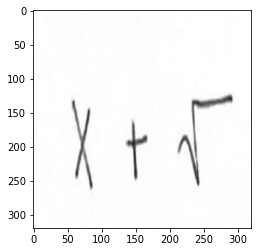

Label:  21
         xmin        ymin        xmax        ymax  confidence  class  \
1   57.689663  131.788345   86.605904  261.678650    0.893020      0   
2  137.209427  161.818146  168.339584  249.422272    0.766872      2   
0  212.015579  123.434090  292.181854  257.388550    0.926700      1   

          name  
1            x  
2    plus sign  
0  square root  
Number of predictions:  3 Prediction:  021


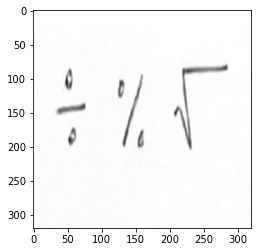

Label:  941
         xmin       ymin        xmax        ymax  confidence  class  \
1   33.853394  85.194992   75.775955  198.977249    0.711370      4   
3   79.596901  88.405594  189.269745  202.230148    0.281411      5   
2  123.673637  93.176422  163.696747  202.301453    0.611673      5   
0  207.582718  79.075043  284.930542  204.101410    0.925641      1   

          name  
1        equal  
3      percent  
2      percent  
0  square root  
Number of predictions:  4 Prediction:  4551


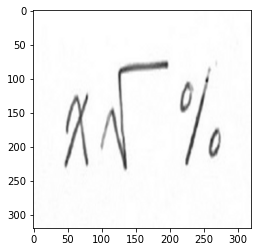

Label:  15
         xmin       ymin        xmax        ymax  confidence  class  \
1   45.479645  74.715431  268.036499  232.705658    0.429882      1   
0  216.020691  81.925323  274.668518  227.621918    0.905674      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


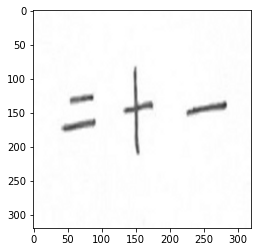

Label:  423
         xmin        ymin        xmax        ymax  confidence  class  \
1   42.400246  123.179825   91.484001  177.542740    0.904273      4   
0  133.597702   83.525604  175.884659  210.946350    0.907995      2   
2  225.301758  134.140976  284.091675  154.125046    0.703640      3   

            name  
1          equal  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


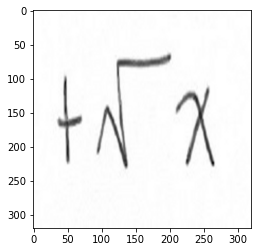

Label:  223
         xmin        ymin        xmax        ymax  confidence  class  \
1   34.752914   63.325394  258.640320  230.447006    0.649358      1   
0  212.383484  110.063629  264.582397  226.187073    0.777295      0   

          name  
1  square root  
0            x  
Number of predictions:  2 Prediction:  10


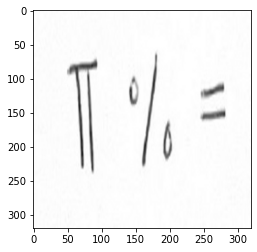

Label:  567
         xmin        ymin        xmax        ymax  confidence  class     name
1  141.356079   63.740128  202.205872  228.341660    0.877426      5  percent
0  246.115601  107.188927  282.250610  160.482513    0.897891      4    equal
Number of predictions:  2 Prediction:  54


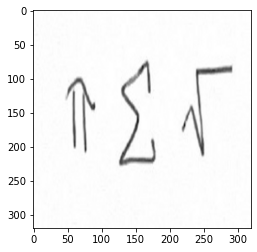

Label:  551
         xmin       ymin        xmax        ymax  confidence  class  \
2   48.705376  98.551994   91.287895  208.236145    0.473148      8   
1  104.856834  74.570084  179.987213  226.998856    0.650728      9   
0  217.966461  81.572243  291.213684  214.285217    0.920061      1   

          name  
2           pi  
1    summation  
0  square root  
Number of predictions:  3 Prediction:  891


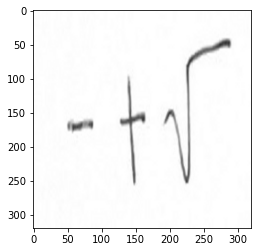

Label:  210
         xmin        ymin        xmax        ymax  confidence  class  \
2   50.934135  160.718994   89.476326  178.449615    0.270919      3   
0  125.112152   95.732178  165.105896  253.793365    0.365737      2   
1  150.128784   41.097328  287.517670  254.271332    0.301951      1   

            name  
2  negative sign  
0      plus sign  
1    square root  
Number of predictions:  3 Prediction:  321


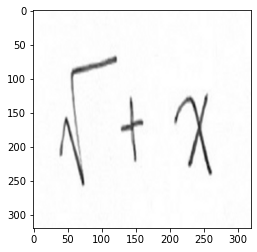

Label:  543
         xmin        ymin        xmax        ymax  confidence  class  \
1   38.170967   67.643044  158.171173  257.821716    0.608236      1   
2  129.433044  129.318481  161.493011  221.154419    0.456511      2   
0  207.875763  122.272430  261.680054  241.801270    0.923129      0   

          name  
1  square root  
2    plus sign  
0            x  
Number of predictions:  3 Prediction:  120


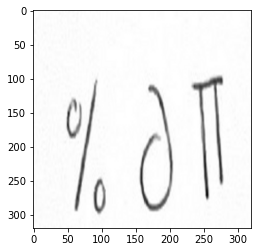

Label:  21
         xmin        ymin        xmax        ymax  confidence  class     name
0   49.391800  103.750343  103.304718  296.378754    0.862794      5  percent
1  156.851608   97.573746  282.333557  294.054260    0.322116      7  product
Number of predictions:  2 Prediction:  57


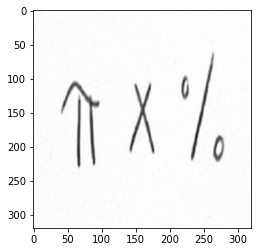

Label:  210
         xmin        ymin        xmax        ymax  confidence  class     name
1   41.650238  103.990692   96.627563  228.665192    0.812164      8       pi
2  142.932114  103.483521  177.358932  211.517120    0.397079      0        x
0  217.349503   63.834221  280.066559  221.830841    0.898633      5  percent
Number of predictions:  3 Prediction:  805


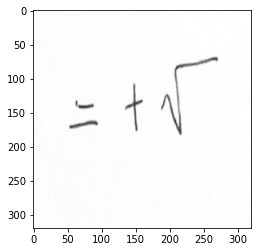

Label:  805
         xmin        ymin        xmax        ymax  confidence  class  \
0   52.974854  133.170227   94.473785  173.322754    0.904754      4   
2  135.140030  107.689842  160.901718  178.053314    0.799387      2   
1  187.401993   69.506355  270.890198  182.912628    0.817759      1   

          name  
0        equal  
2    plus sign  
1  square root  
Number of predictions:  3 Prediction:  421


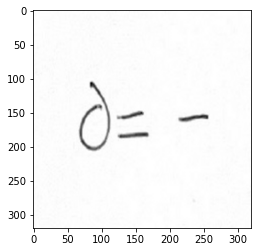

Label:  421
         xmin        ymin        xmax        ymax  confidence  class  \
0   68.042931  105.177872  167.909607  205.857193    0.823652      6   
1  214.103195  152.876114  257.530579  163.302170    0.617537      3   

            name  
0        partial  
1  negative sign  
Number of predictions:  2 Prediction:  63


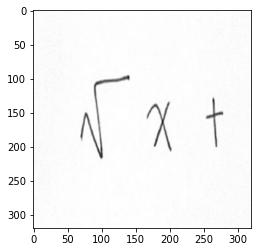

Label:  953
         xmin        ymin        xmax        ymax  confidence  class  \
0   69.132866   94.766830  141.194885  217.827042    0.890460      1   
2  167.630676  134.249039  202.256958  205.980698    0.772672      0   
1  254.311050  128.668686  278.884827  200.848587    0.856805      2   

          name  
0  square root  
2            x  
1    plus sign  
Number of predictions:  3 Prediction:  102


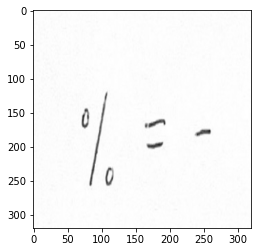

Label:  754
         xmin        ymin        xmax        ymax  confidence  class  \
0   71.534164  121.414284  116.322128  257.770569    0.871050      5   
1  165.105743  160.814056  193.530334  201.951782    0.796219      4   
2  239.086639  174.656174  260.839874  184.424484    0.479513      3   

            name  
0        percent  
1          equal  
2  negative sign  
Number of predictions:  3 Prediction:  543


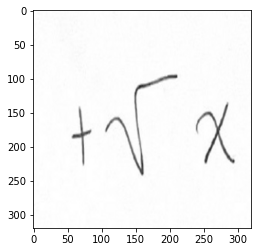

Label:  864
         xmin        ymin        xmax        ymax  confidence  class  \
1   56.603882  142.527161   85.114685  227.989441    0.774507      2   
2   84.778534   93.654221  209.446716  242.068039    0.718836      1   
0  239.766602  137.643265  294.572388  225.810410    0.910042      0   

          name  
1    plus sign  
2  square root  
0            x  
Number of predictions:  3 Prediction:  210


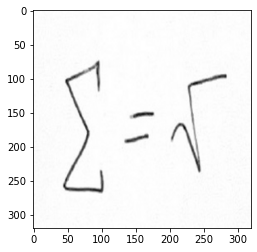

Label:  492
         xmin        ymin        xmax        ymax  confidence  class  \
0   43.413010   74.715004  101.367813  267.085846    0.914714      9   
2  134.382629  150.014191  177.007843  194.011505    0.674941      4   
1  203.503769   94.055077  283.923340  237.058655    0.914346      1   

          name  
0    summation  
2        equal  
1  square root  
Number of predictions:  3 Prediction:  941


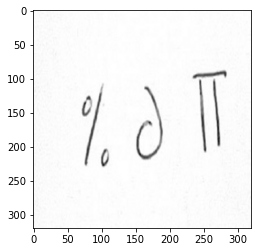

Label:  102
         xmin        ymin        xmax        ymax  confidence  class     name
2   68.504318  109.477280  185.995819  229.736984    0.364119      5  percent
0   72.849106  108.428421  107.814590  229.714981    0.795643      5  percent
1  235.773727   89.370255  283.144531  210.396439    0.634765      7  product
Number of predictions:  3 Prediction:  557


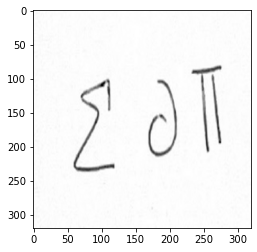

Label:  321
         xmin        ymin        xmax        ymax  confidence  class  \
0   60.188766  102.097466  117.953995  234.823914    0.930858      9   
1  169.538879   80.077469  277.653687  212.662430    0.523274      8   

        name  
0  summation  
1         pi  
Number of predictions:  2 Prediction:  98


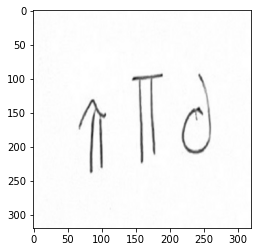

Label:  891
        xmin        ymin        xmax        ymax  confidence  class name
0  67.678238  130.488327  107.103104  235.745865    0.477763      8   pi
1  80.436554   92.217903  258.857361  229.322876    0.356933      8   pi
Number of predictions:  2 Prediction:  88


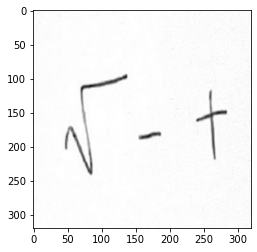

Label:  643
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.915390   93.950134  145.170135  241.086792    0.845280      1   
2  155.295853  179.183304  187.273453  188.925156    0.434863      3   
0  238.769318  117.197586  284.420441  217.575211    0.905355      2   

            name  
1    square root  
2  negative sign  
0      plus sign  
Number of predictions:  3 Prediction:  132


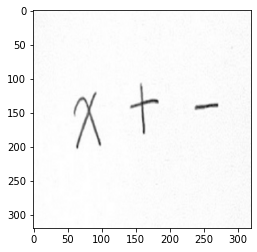

Label:  942
         xmin        ymin        xmax        ymax  confidence  class  \
1   59.428959  119.991928   98.905746  203.004227    0.905356      0   
0  142.741806  108.160309  183.759018  180.747589    0.912479      2   
2  237.868515  136.651657  271.608398  145.413925    0.569661      3   

            name  
1              x  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  023


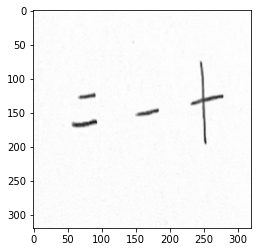

Label:  443
         xmin        ymin        xmax        ymax  confidence  class  \
2   55.748726   76.142456  282.667694  196.996796    0.285596      2   
0   57.918983  122.272125   93.541618  171.127960    0.881705      4   
1  231.531586   76.131096  279.137970  195.416656    0.860924      2   

        name  
2  plus sign  
0      equal  
1  plus sign  
Number of predictions:  3 Prediction:  242


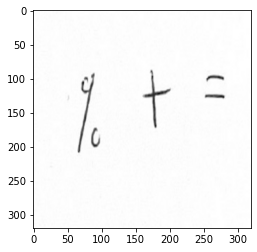

Label:  253
         xmin       ymin        xmax        ymax  confidence  class       name
2   66.167274  92.760201   96.938194  208.950378    0.863758      5    percent
0  162.357422  88.073059  201.572052  171.727966    0.905603      2  plus sign
1  252.292969  95.480476  281.568054  129.379089    0.900642      4      equal
Number of predictions:  3 Prediction:  524


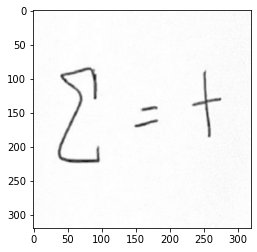

Label:  51
         xmin        ymin        xmax        ymax  confidence  class  \
0   35.835079   82.987480   97.566803  223.782257    0.932973      9   
2  148.961334  141.166946  183.462921  171.253555    0.899816      4   
1  233.796356   88.764618  275.726532  185.955139    0.913835      2   

        name  
0  summation  
2      equal  
1  plus sign  
Number of predictions:  3 Prediction:  942


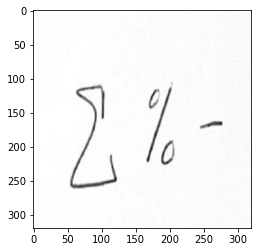

Label:  524
         xmin        ymin        xmax        ymax  confidence  class  \
0   54.360226  109.487473  119.932495  259.785278    0.906588      9   
2  166.823761  109.990417  206.460083  226.448029    0.454180      5   
1  168.371384  109.045151  255.216812  226.699661    0.736201      5   
3  246.035248  163.393097  277.426788  173.121399    0.291989      3   

            name  
0      summation  
2        percent  
1        percent  
3  negative sign  
Number of predictions:  4 Prediction:  9553


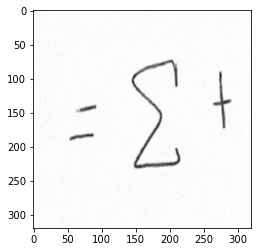

Label:  209
         xmin        ymin        xmax        ymax  confidence  class  \
1   53.995872  139.674744   91.390572  190.031738    0.900620      4   
0  144.571625   73.466705  214.575592  231.599335    0.939564      9   
2  264.522308   91.073517  290.380707  173.088348    0.848566      2   

        name  
1      equal  
0  summation  
2  plus sign  
Number of predictions:  3 Prediction:  492


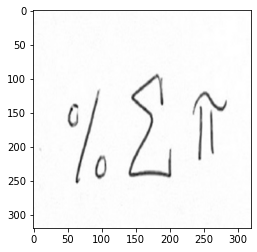

Label:  70
         xmin        ymin        xmax        ymax  confidence  class  \
0   51.041553  117.224007  104.975647  252.789856    0.914543      5   
1  142.899200   95.782562  199.619293  243.206482    0.857570      9   
2  234.768967  120.974846  283.360779  219.335083    0.749769      8   

        name  
0    percent  
1  summation  
2         pi  
Number of predictions:  3 Prediction:  598


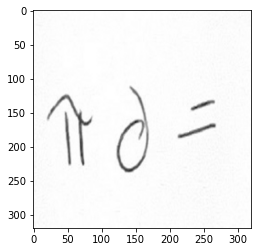

Label:  389
         xmin        ymin        xmax        ymax  confidence  class     name
1   21.617657  118.871819   86.169861  232.907867    0.798325      8       pi
2  125.664986  112.973976  167.556931  235.417755    0.531470      6  partial
0  214.115814  132.174057  267.051849  186.555252    0.891571      4    equal
Number of predictions:  3 Prediction:  864


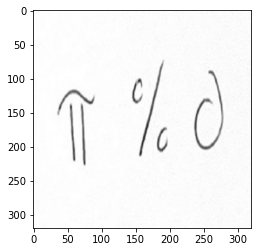

Label:  432
         xmin        ymin        xmax        ymax  confidence  class     name
1   35.546722  114.128082   88.451118  226.354065    0.811619      8       pi
0  145.661072   74.752312  194.989319  215.281250    0.881788      5  percent
2  238.929092   87.183617  277.846252  205.174896    0.807751      6  partial
Number of predictions:  3 Prediction:  856


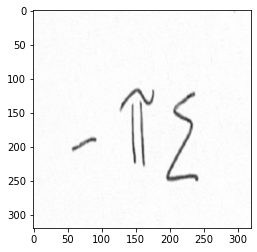

Label:  242
        xmin        ymin        xmax        ymax  confidence  class name
0  56.473206  113.752281  244.247742  249.355316     0.83332      8   pi
Number of predictions:  1 Prediction:  8


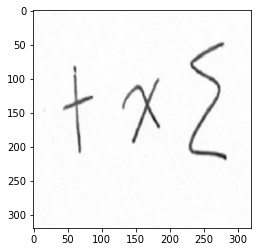

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
0   43.989193   81.395599   88.335419  208.635651    0.892420      2   
1  131.010818  100.135956  185.738754  195.179199    0.839075      0   
2  228.671600   47.180840  284.146271  219.248932    0.671023      9   

        name  
0  plus sign  
1          x  
2  summation  
Number of predictions:  3 Prediction:  209


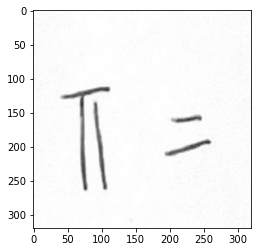

Label:  120
         xmin        ymin       xmax        ymax  confidence  class     name
1   42.689457  111.689911  112.33287  264.243378    0.702624      7  product
0  193.269211  154.421951  260.85083  213.532211    0.918480      4    equal
Number of predictions:  2 Prediction:  74


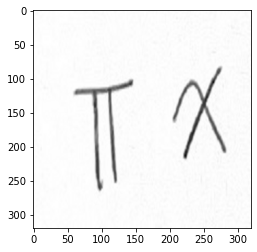

Label:  132
         xmin        ymin        xmax        ymax  confidence  class     name
1   60.750782  101.161530  146.073196  264.001343    0.782850      7  product
0  205.686707   82.939102  283.250183  217.633347    0.945427      0        x
Number of predictions:  2 Prediction:  70


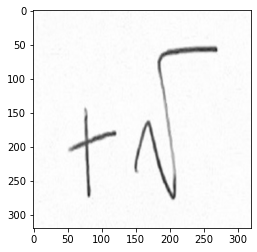

Label:  567
         xmin        ymin        xmax        ymax  confidence  class  \
0   52.715557  144.421280  122.413864  274.381042    0.866970      2   
1  148.649002   51.824097  269.741241  280.725159    0.534875      1   

          name  
0    plus sign  
1  square root  
Number of predictions:  2 Prediction:  21


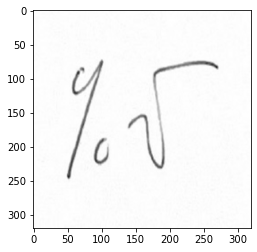

Label:  598
         xmin       ymin        xmax        ymax  confidence  class  \
1   50.871613  71.662704  107.280823  245.523392    0.837815      5   
0  139.864548  74.490227  271.851013  231.971741    0.855106      1   

          name  
1      percent  
0  square root  
Number of predictions:  2 Prediction:  51


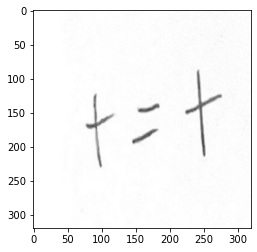

Label:  876
         xmin        ymin        xmax        ymax  confidence  class  \
1   77.596870  122.957458  117.078636  229.597595    0.735706      2   
2  146.649216  137.237350  185.653976  195.109085    0.565512      4   
0  223.969498   88.925026  276.068604  213.082428    0.881098      2   

        name  
1  plus sign  
2      equal  
0  plus sign  
Number of predictions:  3 Prediction:  242


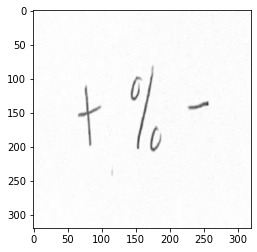

Label:  967
         xmin        ymin        xmax        ymax  confidence  class  \
0   66.426193  111.422478   98.686340  198.015900    0.872241      2   
1  144.483734   81.628250  215.007050  207.832413    0.584148      5   
2  228.835922  134.624680  256.931702  144.823502    0.385223      3   

            name  
0      plus sign  
1        percent  
2  negative sign  
Number of predictions:  3 Prediction:  253


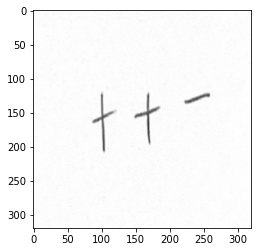

Label:  856
         xmin        ymin        xmax        ymax  confidence  class  \
0   86.382309  121.548080  120.957413  206.192154    0.786057      2   
1  149.097717  121.916428  185.375549  196.950668    0.745194      2   
2  222.108536  121.431984  258.743500  137.255859    0.294807      3   

            name  
0      plus sign  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  223


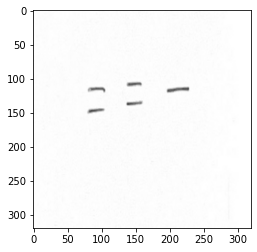

Label:  74
         xmin        ymin        xmax        ymax  confidence  class  \
0   80.593842  113.078949  105.947205  150.235748    0.877222      4   
1  137.038467  106.540390  160.551071  138.949707    0.862320      4   
2  196.637024  112.949059  229.158539  120.701393    0.487363      3   

            name  
0          equal  
1          equal  
2  negative sign  
Number of predictions:  3 Prediction:  443


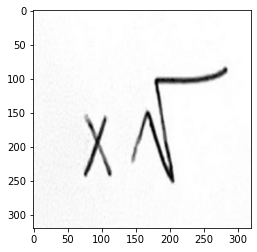

Label:  624
         xmin        ymin        xmax        ymax  confidence  class  \
1   75.060303  153.846100  114.592758  243.700470    0.856450      0   
0  147.261200   81.677963  284.744904  253.244278    0.882982      1   

          name  
1            x  
0  square root  
Number of predictions:  2 Prediction:  01


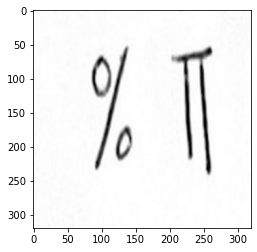

Label:  1
         xmin       ymin        xmax        ymax  confidence  class     name
0   85.789322  53.140846  144.464279  232.165070    0.928058      5  percent
1  205.744186  54.050591  263.536346  239.566193    0.813284      7  product
Number of predictions:  2 Prediction:  57


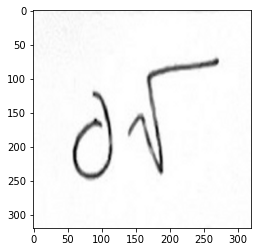

Label:  2
        xmin      ymin        xmax        ymax  confidence  class         name
0  58.688583  69.71611  269.825439  243.468521    0.775106      1  square root
Number of predictions:  1 Prediction:  1


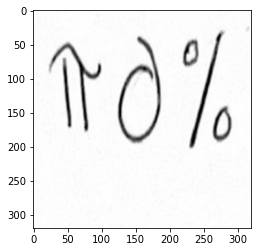

Label:  87
         xmin       ymin        xmax        ymax  confidence  class     name
1   15.422653  35.499672  289.162903  200.210632    0.584656      5  percent
3   20.260910  38.269859  290.323853  197.592834    0.304825      8       pi
2   24.155869  44.713913  109.464828  188.670258    0.359689      8       pi
0  221.679596  31.697632  290.081879  201.775650    0.756541      5  percent
Number of predictions:  4 Prediction:  5885


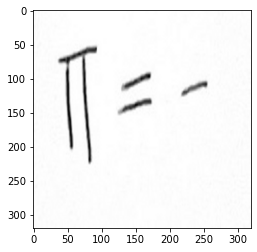

Label:  96
         xmin        ymin        xmax        ymax  confidence  class  \
2   39.350334   52.509277   91.580818  222.812012    0.382788      7   
0  126.952911   92.186852  173.427185  151.613251    0.776904      4   
1  218.699738  104.071594  255.672028  125.255676    0.525021      3   

            name  
2        product  
0          equal  
1  negative sign  
Number of predictions:  3 Prediction:  743


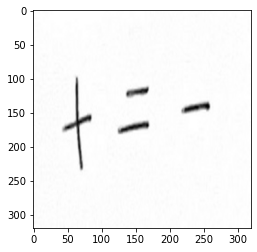

Label:  2
         xmin        ymin        xmax        ymax  confidence  class  \
1   43.711258   98.781761   85.356537  233.845337    0.860572      2   
0  125.366493  112.584091  170.193939  179.659470    0.893738      4   
2  219.773804  135.249344  259.123505  150.260178    0.582545      3   

            name  
1      plus sign  
0          equal  
2  negative sign  
Number of predictions:  3 Prediction:  243


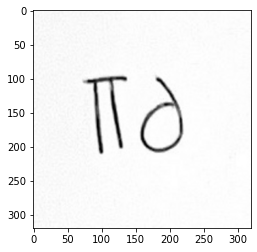

Label:  95
        xmin       ymin        xmax        ymax  confidence  class     name
0  75.737091  97.084358  220.291351  209.835724    0.476899      7  product
1  77.067192  97.308105  218.919312  209.933289    0.437484      8       pi
Number of predictions:  2 Prediction:  78


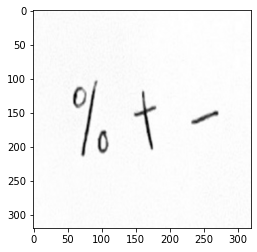

Label:  58
         xmin        ymin        xmax        ymax  confidence  class  \
0   58.274368  103.387978  106.660141  213.384125    0.888033      5   
2  148.855133  117.930489  180.497437  204.399902    0.559480      2   
1  233.263229  148.579849  272.188965  166.036118    0.599669      3   

            name  
0        percent  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  523


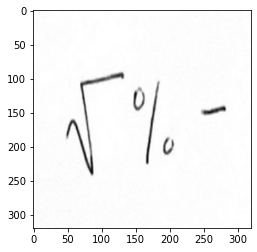

Label:  523
         xmin        ymin        xmax        ymax  confidence  class  \
2   49.648521   91.189384  189.936981  241.252289    0.399075      1   
3   86.607910   93.074738  220.377533  236.518799    0.306003      5   
0  146.448090  104.509964  204.519592  225.876724    0.747120      5   
1  247.691788  140.825577  282.602875  152.963455    0.693725      3   

            name  
2    square root  
3        percent  
0        percent  
1  negative sign  
Number of predictions:  4 Prediction:  1553


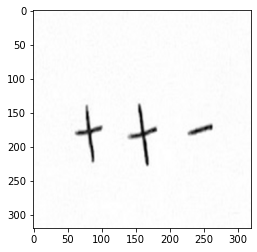

Label:  32
         xmin        ymin        xmax        ymax  confidence  class  \
0   63.038193  139.697052  101.379852  222.674103    0.889819      2   
1  140.617813  137.275604  180.735092  227.407776    0.795629      2   
2  228.434311  167.665665  263.280426  182.837662    0.446007      3   

            name  
0      plus sign  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  223


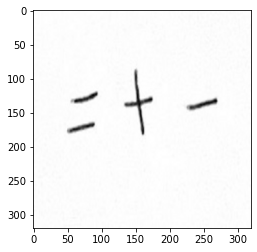

Label:  865
         xmin        ymin        xmax        ymax  confidence  class  \
1   51.046364  120.118935   93.945595  179.347565    0.878079      4   
0  134.083435   87.879532  174.886108  181.326370    0.890167      2   
2  226.318893  129.090103  270.560486  146.506851    0.603657      3   

            name  
1          equal  
0      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


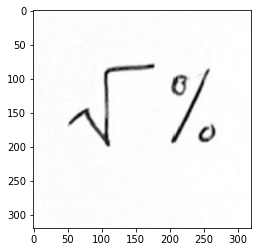

Label:  93
         xmin       ymin        xmax        ymax  confidence  class  \
1   52.879101  78.928696  176.552536  198.873306    0.851688      1   
0  202.148956  85.874748  267.517883  195.441467    0.894677      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


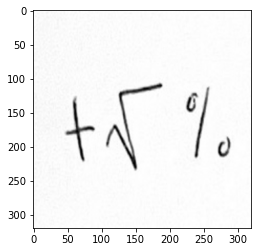

Label:  52
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.336113  106.745369  216.574860  233.095734    0.419901      1   
1   48.983810  128.518906   90.228439  220.977737    0.762937      2   
0  224.874390  111.981277  289.343933  217.775986    0.900058      5   

          name  
2  square root  
1    plus sign  
0      percent  
Number of predictions:  3 Prediction:  125


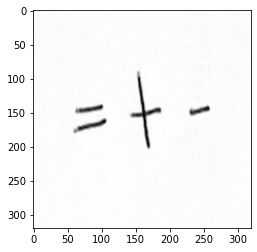

Label:  61
         xmin        ymin        xmax        ymax  confidence  class  \
0   61.201744  138.557251  106.559151  179.322388    0.876768      4   
1  143.306274   92.935577  188.248596  201.810120    0.794003      2   
2  230.484436  140.345825  258.133606  154.076660    0.438781      3   

            name  
0          equal  
1      plus sign  
2  negative sign  
Number of predictions:  3 Prediction:  423


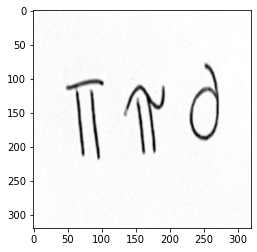

Label:  25
        xmin       ymin        xmax        ymax  confidence  class name
0  62.709007  77.486946  271.640717  213.780792    0.705468      8   pi
Number of predictions:  1 Prediction:  8


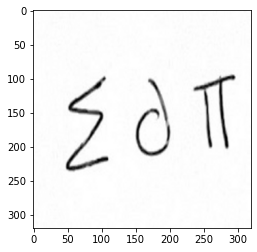

Label:  423
         xmin       ymin        xmax        ymax  confidence  class       name
0   48.510323  96.309006  110.224022  234.768143    0.929141      9  summation
1  236.548828  95.337036  296.008057  203.261719    0.557626      7    product
Number of predictions:  2 Prediction:  97


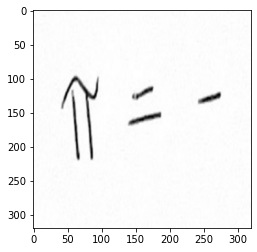

Label:  423
         xmin        ymin        xmax        ymax  confidence  class  \
1   41.972092   97.074860   95.023666  219.433594    0.875873      8   
0  140.859222  112.114609  187.432800  168.348953    0.887097      4   
2  243.381058  120.416656  275.069183  136.303711    0.666742      3   

            name  
1             pi  
0          equal  
2  negative sign  
Number of predictions:  3 Prediction:  843


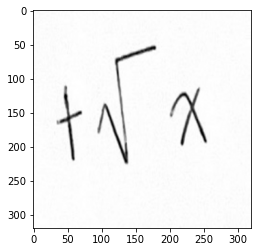

Label:  24
         xmin        ymin        xmax        ymax  confidence  class  \
2   35.428421   51.073044  234.185989  224.903763    0.293486      1   
1   36.715908  112.678909   71.459381  220.391037    0.772952      2   
0  202.724075  115.523987  253.713943  198.653473    0.865831      0   

          name  
2  square root  
1    plus sign  
0            x  
Number of predictions:  3 Prediction:  120


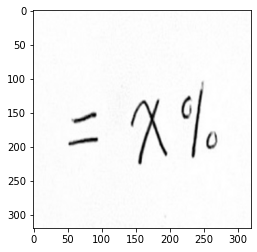

Label:  728
         xmin        ymin        xmax        ymax  confidence  class     name
0   52.132240  150.535889   94.571037  198.025818    0.906082      4    equal
1  143.085281  106.231125  264.675812  226.006973    0.780600      0        x
4  143.122299  129.265137  196.604843  226.471497    0.319620      0        x
2  143.647430  105.322037  268.366943  224.098038    0.761836      5  percent
3  218.008423  108.973969  269.903961  218.651245    0.702607      5  percent
Number of predictions:  5 Prediction:  40055


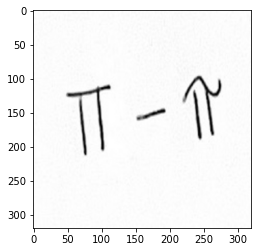

Label:  4
         xmin        ymin        xmax        ymax  confidence  class     name
2   40.409409   95.939514  283.991638  206.278046    0.317418      7  product
1   49.782768  108.925003  112.714607  212.229019    0.671811      7  product
0  191.157776   96.135246  275.279236  188.789978    0.721237      8       pi
Number of predictions:  3 Prediction:  778


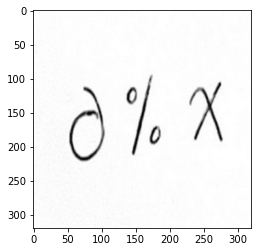

Label:  325
         xmin        ymin        xmax        ymax  confidence  class     name
1   58.309685   94.150383  189.833954  219.300598    0.736951      5  percent
2  133.038559   94.672073  185.730606  215.061691    0.433902      5  percent
0  230.092178  104.315567  277.153442  193.537704    0.914757      0        x
Number of predictions:  3 Prediction:  550


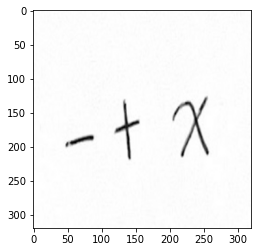

Label:  249
         xmin        ymin        xmax        ymax  confidence  class  \
2   68.374954  132.206055  156.173203  218.229248    0.672486      2   
1  121.081757  132.903290  155.471283  217.761749    0.686446      2   
0  205.335205  127.795502  258.258942  214.684662    0.917886      0   

        name  
2  plus sign  
1  plus sign  
0          x  
Number of predictions:  3 Prediction:  220


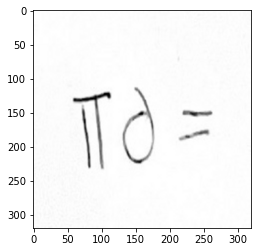

Label:  42
         xmin        ymin        xmax        ymax  confidence  class   name
1   59.113815  116.058990  176.286911  232.384064    0.754067      8     pi
0  215.708450  146.771194  262.501678  189.075272    0.902571      4  equal
Number of predictions:  2 Prediction:  84


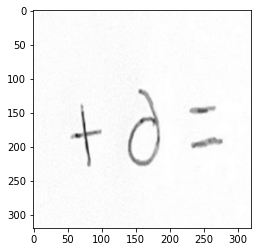

Label:  249
         xmin        ymin        xmax        ymax  confidence  class  \
0   58.024803  140.011658   99.204720  228.050842    0.914669      2   
2  140.418457  116.577118  184.088440  226.226074    0.878336      6   
1  229.866501  140.276260  277.863159  202.699051    0.902618      4   

        name  
0  plus sign  
2    partial  
1      equal  
Number of predictions:  3 Prediction:  264


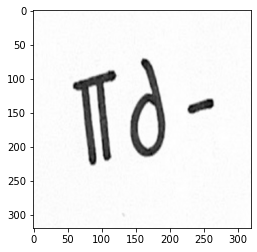

Label:  32
       xmin       ymin        xmax        ymax  confidence  class name
0  59.88588  71.067535  260.476257  225.489594     0.59395      8   pi
Number of predictions:  1 Prediction:  8


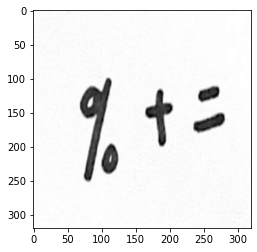

Label:  15
         xmin        ymin        xmax        ymax  confidence  class  \
0   69.863342   99.954803  121.976273  250.361267    0.893175      5   
2  166.252167  116.684067  203.784912  198.106979    0.626637      2   
3  167.196228  111.415405  282.441345  198.102997    0.532813      4   
1  236.900787  111.750885  280.728363  178.665314    0.646260      4   

        name  
0    percent  
2  plus sign  
3      equal  
1      equal  
Number of predictions:  4 Prediction:  5244


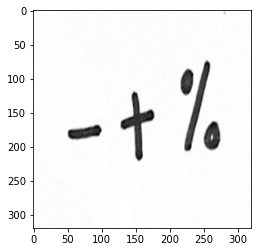

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
1   48.871834   92.289780  264.364502  222.745865    0.486368      2   
2  129.034042   81.608826  273.350098  219.532471    0.347844      5   
3  129.850021  115.412415  177.501511  219.087585    0.261176      2   
0  217.494019   74.387558  273.361115  208.346085    0.783708      5   

        name  
1  plus sign  
2    percent  
3  plus sign  
0    percent  
Number of predictions:  4 Prediction:  2525


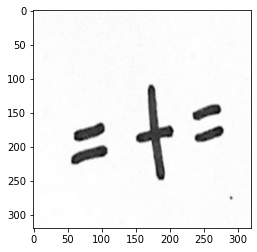

Label:  223
         xmin        ymin        xmax        ymax  confidence  class  \
0   56.535587  165.797989  108.299088  225.470901    0.861260      4   
2  147.576904  111.481834  208.400818  248.038147    0.640726      2   
1  234.441025  138.632172  279.197754  192.705780    0.768504      4   

        name  
0      equal  
2  plus sign  
1      equal  
Number of predictions:  3 Prediction:  424


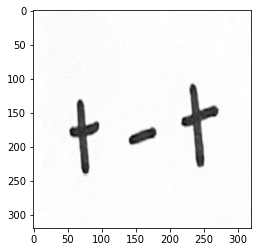

Label:  153
         xmin        ymin        xmax        ymax  confidence  class  \
0   54.453430  131.379578   96.206665  239.470459    0.825446      2   
2   57.821594  108.821365  273.882080  234.190048    0.655094      2   
1  214.084839  108.397354  271.692444  228.575760    0.798231      2   

        name  
0  plus sign  
2  plus sign  
1  plus sign  
Number of predictions:  3 Prediction:  222


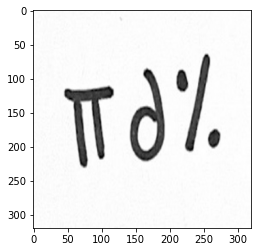

Label:  405
        xmin       ymin        xmax        ymax  confidence  class     name
0  59.758522  63.313034  274.981415  225.723343    0.580493      5  percent
Number of predictions:  1 Prediction:  5


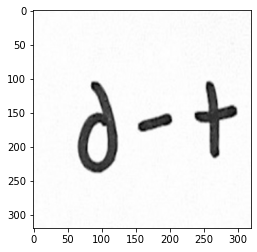

Label:  243
         xmin        ymin        xmax        ymax  confidence  class  \
1   66.727097  104.599533  184.070801  238.213791    0.643212      6   
3   67.145615  104.621674  120.061508  237.651031    0.256447      6   
2   68.863480  102.906166  300.269653  229.958282    0.272488      2   
0  239.980957  105.361984  298.817810  216.316574    0.822491      2   

        name  
1    partial  
3    partial  
2  plus sign  
0  plus sign  
Number of predictions:  4 Prediction:  6622


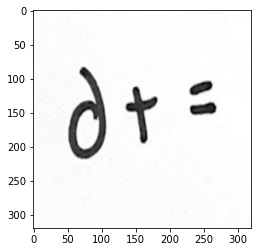

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
2   51.747070   83.426224  183.296158  217.439743    0.300327      6   
4   52.345673   83.130028  190.671616  218.109344    0.274446      2   
1   54.707649   83.075363  181.418976  218.104385    0.501375      5   
3  136.723816  110.898247  181.894104  197.425629    0.278006      2   
0  230.224884  104.722610  268.016754  152.435898    0.920417      4   

        name  
2    partial  
4  plus sign  
1    percent  
3  plus sign  
0      equal  
Number of predictions:  5 Prediction:  62524


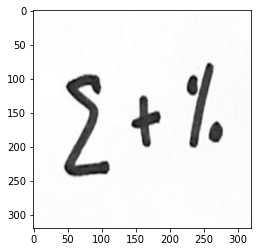

Label:  57
         xmin        ymin        xmax        ymax  confidence  class  \
0   45.866989   93.921173  110.263794  241.366791    0.834030      9   
3  145.123657  126.438751  186.779785  199.092773    0.490173      2   
2  169.186096   77.394592  274.342163  201.619019    0.794298      5   
1  225.995453   77.752007  277.734711  200.710632    0.810374      5   

        name  
0  summation  
3  plus sign  
2    percent  
1    percent  
Number of predictions:  4 Prediction:  9255


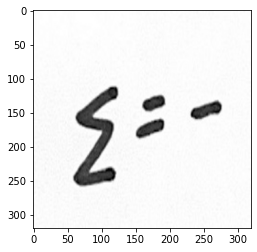

Label:  42
        xmin        ymin        xmax        ymax  confidence  class       name
0  59.111271  111.974174  151.752884  256.507812    0.786915      9  summation
Number of predictions:  1 Prediction:  9


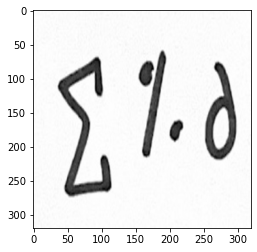

Label:  54
         xmin       ymin        xmax        ymax  confidence  class       name
0   35.082325  69.551430  112.440720  271.125885    0.910902      9  summation
1  154.211472  59.314148  224.926285  216.546722    0.668539      5    percent
2  256.457886  70.424217  297.231567  219.043365    0.627793      6    partial
Number of predictions:  3 Prediction:  956


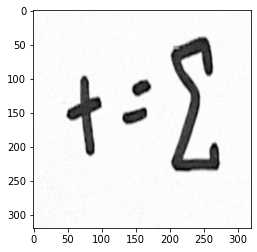

Label:  54
         xmin       ymin        xmax        ymax  confidence  class       name
0   49.011902  97.319183  100.273895  212.847473    0.808953      2  plus sign
1  136.408173  39.648102  273.887390  235.276581    0.553904      9  summation
Number of predictions:  2 Prediction:  29


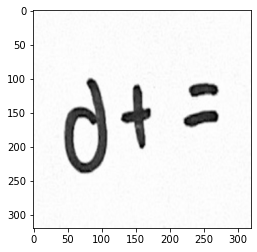

Label:  92
         xmin        ymin        xmax       ymax  confidence  class     name
1   47.920712  100.878235  172.515930  237.50885    0.702773      5  percent
0  223.034271  107.917877  271.849945  170.25000    0.901328      4    equal
Number of predictions:  2 Prediction:  54


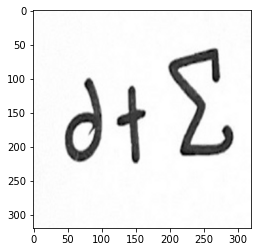

Label:  956
         xmin       ymin        xmax        ymax  confidence  class       name
1   49.508659  99.706604  122.701759  222.291687    0.611566      6    partial
0  199.842972  56.517563  293.303406  214.640945    0.926236      9  summation
Number of predictions:  2 Prediction:  69


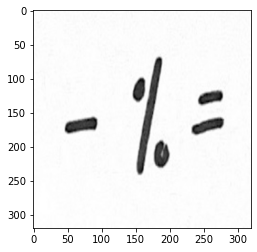

Label:  15
         xmin        ymin        xmax        ymax  confidence  class  \
2   47.081306  157.188156   93.876518  180.202011    0.500626      3   
1  108.289955   69.427841  209.516510  239.794083    0.742787      5   
3  145.807007   65.917007  277.275452  236.669601    0.443084      5   
0  234.414719  119.385979  279.346558  180.920044    0.788942      4   

            name  
2  negative sign  
1        percent  
3        percent  
0          equal  
Number of predictions:  4 Prediction:  3554


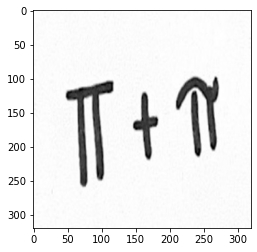

Label:  78
         xmin        ymin        xmax        ymax  confidence  class     name
1   46.154728  103.095985  167.345505  258.624268    0.278705      7  product
0  177.581070   97.982468  270.676514  216.306412    0.517413      8       pi
Number of predictions:  2 Prediction:  78


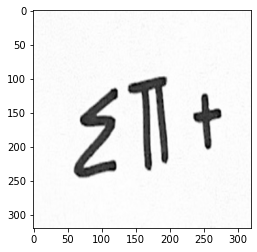

Label:  650
         xmin        ymin        xmax        ymax  confidence  class  \
0   59.677811  112.130371  123.006271  244.471588    0.817987      9   
2   61.665573   97.770004  275.928467  236.095688    0.327165      7   
1  236.044632  122.601105  276.180756  204.674286    0.774372      2   

        name  
0  summation  
2    product  
1  plus sign  
Number of predictions:  3 Prediction:  972


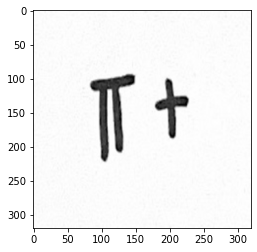

Label:  624
        xmin        ymin        xmax        ymax  confidence  class       name
0   84.14933   94.720398  226.802155  222.539154    0.813026      7    product
1  179.84697  100.031815  227.411728  187.808670    0.755034      2  plus sign
Number of predictions:  2 Prediction:  72


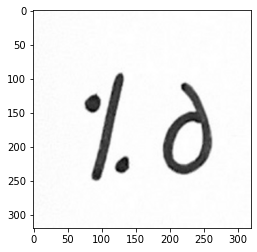

Label:  42
         xmin        ymin        xmax        ymax  confidence  class     name
0   75.705261   93.673996  139.158249  248.781387    0.929160      5  percent
1  191.347107  106.427185  261.669067  239.955750    0.883715      6  partial
Number of predictions:  2 Prediction:  56


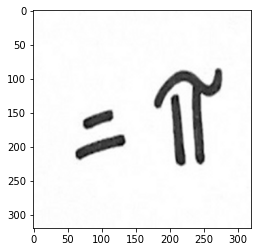

Label:  142
         xmin        ymin        xmax        ymax  confidence  class   name
1   62.104145  147.199753  133.837845  218.285110    0.902102      4  equal
0  178.054626   85.454727  276.479370  227.172989    0.931289      8     pi
Number of predictions:  2 Prediction:  48


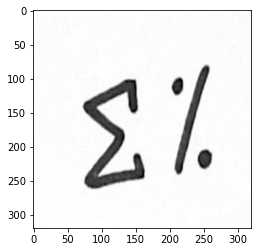

Label:  865
         xmin        ymin        xmax        ymax  confidence  class  \
0   72.892273  101.284309  161.804581  261.972931    0.940790      9   
1  204.404602   81.277763  261.148163  239.680176    0.896821      5   

        name  
0  summation  
1    percent  
Number of predictions:  2 Prediction:  95


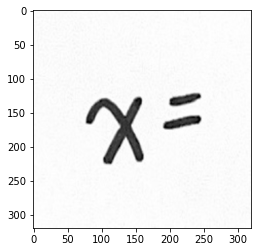

Label:  23
         xmin        ymin        xmax        ymax  confidence  class   name
1   79.049088  127.383247  163.483856  224.743042    0.879820      0      x
0  192.745361  122.310104  246.777771  173.871353    0.883079      4  equal
Number of predictions:  2 Prediction:  04


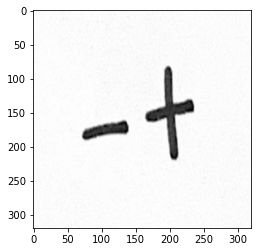

Label:  13
         xmin       ymin        xmax        ymax  confidence  class       name
0  107.315353  82.667511  236.243423  219.867188    0.845906      2  plus sign
Number of predictions:  1 Prediction:  2


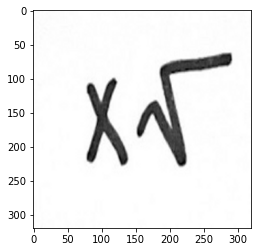

Label:  925
        xmin       ymin        xmax        ymax  confidence  class  \
0  78.185356  62.097733  290.441345  229.429031    0.830663      1   
1  78.374489  63.266617  289.349609  229.596176    0.396567      0   
2  78.462669  99.207718  137.102280  227.895889    0.362531      0   

          name  
0  square root  
1            x  
2            x  
Number of predictions:  3 Prediction:  100


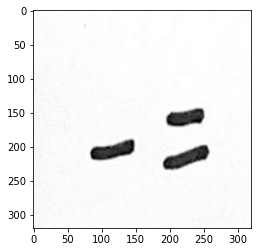

Label:  48
         xmin        ymin        xmax        ymax  confidence  class  \
2   83.579391  143.488052  257.882874  232.330276    0.388953      4   
1   83.952400  189.284500  149.130890  218.993698    0.489000      3   
0  191.539291  144.712158  257.989990  233.657806    0.796447      4   

            name  
2          equal  
1  negative sign  
0          equal  
Number of predictions:  3 Prediction:  434


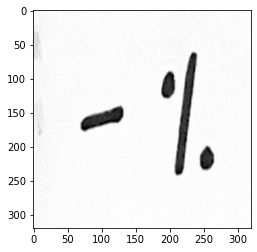

Label:  43
         xmin        ymin        xmax        ymax  confidence  class  \
2   69.863052  140.776703  132.863129  175.668060    0.292162      3   
0   72.455162   60.802269  263.148956  242.006409    0.851598      5   
1  188.216125   62.033928  264.497314  241.912048    0.798604      5   

            name  
2  negative sign  
0        percent  
1        percent  
Number of predictions:  3 Prediction:  355


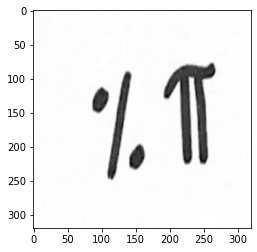

Label:  95
         xmin       ymin        xmax        ymax  confidence  class     name
0   86.866585  90.449188  162.160553  246.801056    0.909228      5  percent
1  193.851273  77.597488  266.675354  231.013382    0.678508      8       pi
Number of predictions:  2 Prediction:  58


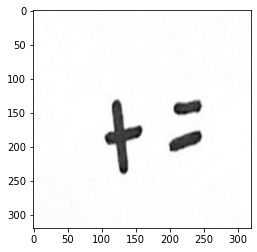

Label:  264
         xmin        ymin        xmax        ymax  confidence  class  \
0  105.836739  131.667603  159.604431  239.513641    0.912505      2   
1  200.342667  132.022018  247.474136  206.828629    0.878416      4   

        name  
0  plus sign  
1      equal  
Number of predictions:  2 Prediction:  24


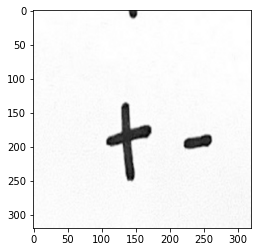

Label:  532
         xmin        ymin        xmax        ymax  confidence  class  \
0  107.462341  135.592560  173.166565  249.977966    0.909420      2   
2  108.550369  135.414474  261.053528  250.581985    0.291301      2   
1  221.363586  183.099274  262.008636  202.879181    0.328651      3   

            name  
0      plus sign  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  223


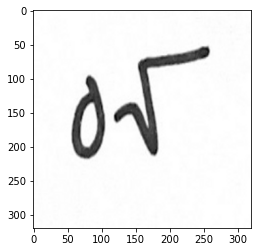

Label:  323
        xmin       ymin        xmax        ymax  confidence  class  \
0  59.843857  51.258476  259.227539  214.048126    0.915431      1   

          name  
0  square root  
Number of predictions:  1 Prediction:  1


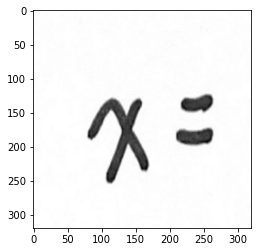

Label:  89
         xmin        ymin        xmax        ymax  confidence  class   name
0   80.935280  129.169647  168.458496  253.258148    0.913586      0      x
1  211.872498  124.521919  264.695862  196.420654    0.897132      4  equal
Number of predictions:  2 Prediction:  04


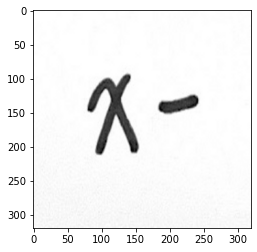

Label:  72
        xmin       ymin        xmax       ymax  confidence  class name
0  80.247124  94.149597  164.005585  211.21933    0.846128      0    x
Number of predictions:  1 Prediction:  0


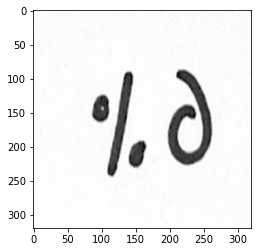

Label:  424
         xmin       ymin        xmax        ymax  confidence  class     name
1   85.304771  88.066986  259.178925  243.695068    0.456000      5  percent
0   86.740486  91.424072  163.206909  242.538574    0.889462      5  percent
2  199.964493  87.140068  261.860657  228.979980    0.358549      6  partial
Number of predictions:  3 Prediction:  556


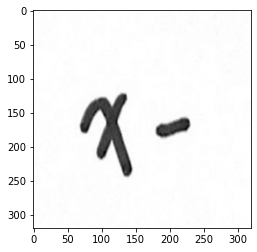

Label:  34
        xmin        ymin        xmax        ymax  confidence  class name
1  67.119514  121.266479  230.033813  243.647919    0.690038      0    x
0  69.958183  121.535828  143.660797  242.729523    0.848672      0    x
Number of predictions:  2 Prediction:  00


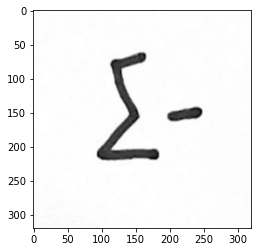

Label:  42
       xmin       ymin        xmax        ymax  confidence  class       name
0  93.03096  61.525642  247.312698  219.392883    0.931321      9  summation
Number of predictions:  1 Prediction:  9


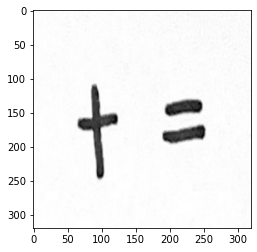

Label:  967
         xmin        ymin        xmax        ymax  confidence  class  \
1   65.746887  109.449051  123.755203  246.684677    0.907847      2   
0  190.464188  131.491470  251.920486  194.151840    0.923244      4   

        name  
1  plus sign  
0      equal  
Number of predictions:  2 Prediction:  24


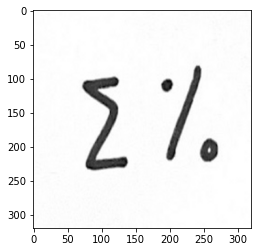

Label:  3
         xmin       ymin        xmax        ymax  confidence  class       name
1   72.179810  97.927002  137.773224  233.132416    0.931987      9  summation
0  188.181747  81.745483  271.265137  221.697632    0.932207      5    percent
Number of predictions:  2 Prediction:  95


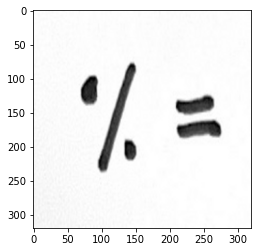

Label:  54
         xmin        ymin        xmax        ymax  confidence  class     name
0   69.870285   76.826889  151.466736  235.909836    0.938953      5  percent
1  209.826630  125.961388  275.848053  187.102081    0.922901      4    equal
Number of predictions:  2 Prediction:  54


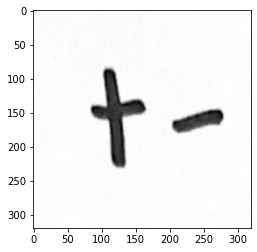

Label:  4
         xmin        ymin        xmax        ymax  confidence  class  \
0   85.255325   85.273796  165.170593  229.406891    0.945462      2   
1  203.907227  145.756851  278.050537  179.204300    0.438837      3   

            name  
0      plus sign  
1  negative sign  
Number of predictions:  2 Prediction:  23


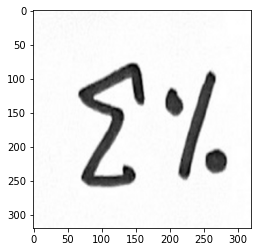

Label:  843
         xmin       ymin        xmax        ymax  confidence  class       name
1   65.791595  77.468330  164.263733  257.411774    0.866814      9  summation
0  196.724594  88.936485  283.606140  247.318054    0.893288      5    percent
Number of predictions:  2 Prediction:  95


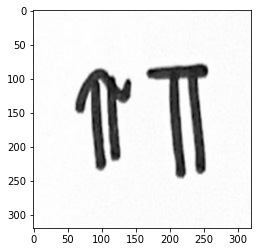

Label:  232
        xmin       ymin        xmax        ymax  confidence  class name
1  61.329346  78.936813  258.256165  245.122787    0.356109      8   pi
0  61.770264  84.150917  142.139145  237.743622    0.790178      8   pi
Number of predictions:  2 Prediction:  88


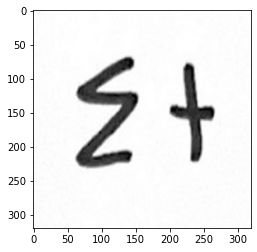

Label:  595
         xmin       ymin        xmax        ymax  confidence  class       name
1   61.946243  68.571671  153.872635  229.905807    0.923207      9  summation
0  201.737839  77.411507  266.488007  221.569702    0.945033      2  plus sign
Number of predictions:  2 Prediction:  92


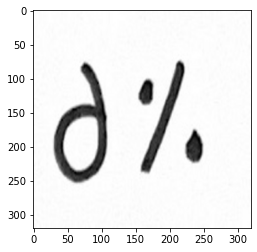

Label:  76
         xmin       ymin        xmax        ymax  confidence  class     name
1   29.775871  75.024628  247.116241  250.930328    0.590586      5  percent
2   30.197651  77.305077  106.867813  250.522339    0.562968      6  partial
0  155.590347  75.349068  248.666061  239.393921    0.883758      5  percent
Number of predictions:  3 Prediction:  565


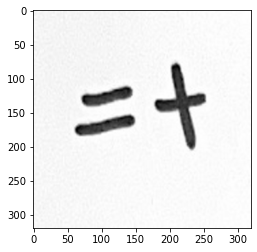

Label:  65
         xmin        ymin        xmax        ymax  confidence  class  \
1   61.548992  112.701744  147.592331  182.908752    0.910380      4   
0  178.962524   77.908585  252.998566  204.044510    0.926132      2   

        name  
1      equal  
0  plus sign  
Number of predictions:  2 Prediction:  42


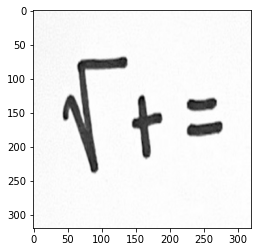

Label:  29
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.150513   68.210632  184.125122  236.761292    0.462187      1   
1  145.320969  125.083542  189.441513  217.688431    0.739983      2   
0  225.350052  128.831558  277.929321  184.130539    0.921155      4   

          name  
2  square root  
1    plus sign  
0        equal  
Number of predictions:  3 Prediction:  124


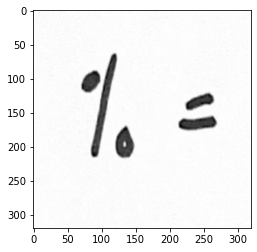

Label:  102
         xmin       ymin        xmax        ymax  confidence  class     name
0   70.830643   64.13868  147.675095  217.852539    0.951916      5  percent
1  214.493332  121.55780  268.467438  174.689514    0.901084      4    equal
Number of predictions:  2 Prediction:  54


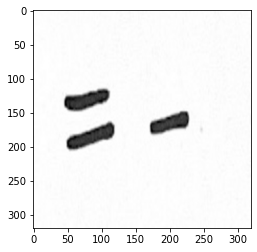

Label:  920
         xmin        ymin        xmax        ymax  confidence  class  \
0   45.873089  115.206985  118.858643  204.069290    0.924572      4   
1  173.249084  148.315018  227.503448  181.824081    0.713902      3   

            name  
0          equal  
1  negative sign  
Number of predictions:  2 Prediction:  43


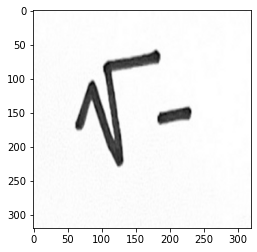

Label:  70
        xmin      ymin        xmax        ymax  confidence  class         name
0  63.070358  58.65416  230.268753  228.866409    0.936419      1  square root
Number of predictions:  1 Prediction:  1


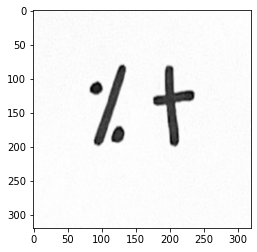

Label:  764
         xmin       ymin        xmax        ymax  confidence  class       name
1   83.217117  81.206398  134.774368  197.589935    0.902290      5    percent
0  176.752975  81.770615  236.472855  199.430038    0.913672      2  plus sign
Number of predictions:  2 Prediction:  52


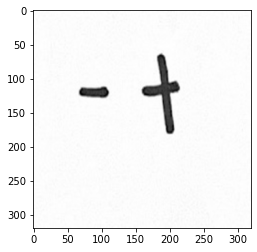

Label:  943
         xmin        ymin        xmax        ymax  confidence  class  \
1   66.803429   64.298653  216.154999  182.375214    0.688551      2   
2   68.665588  112.503990  111.362976  127.900185    0.348765      3   
0  160.249863   64.801514  215.150040  180.686188    0.863758      2   

            name  
1      plus sign  
2  negative sign  
0      plus sign  
Number of predictions:  3 Prediction:  232


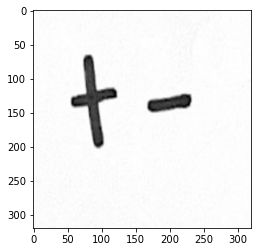

Label:  54
         xmin        ymin        xmax        ymax  confidence  class  \
0   55.709896   65.361870  123.103088  201.475342    0.925345      2   
2   57.308365   63.955078  233.679611  202.285950    0.310503      2   
1  168.736542  123.616776  231.095642  148.901291    0.466609      3   

            name  
0      plus sign  
2      plus sign  
1  negative sign  
Number of predictions:  3 Prediction:  223


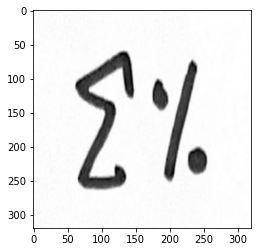

Label:  3
         xmin       ymin        xmax        ymax  confidence  class       name
1   61.969074  64.109528  145.511139  260.053009    0.573409      9  summation
2   64.214622  61.744591  256.191010  254.206451    0.274254      5    percent
0  177.032288  68.722572  254.924255  250.218872    0.751354      5    percent
Number of predictions:  3 Prediction:  955


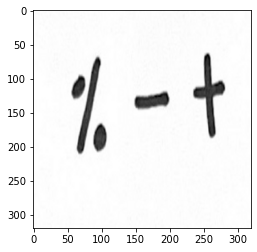

Label:  232
         xmin       ymin        xmax        ymax  confidence  class       name
0   56.532772  69.007721  105.070572  209.531006    0.894343      5    percent
2  148.489563  63.251389  285.446655  188.975235    0.365232      2  plus sign
1  231.553040  64.191521  283.239319  186.485138    0.781005      2  plus sign
Number of predictions:  3 Prediction:  522


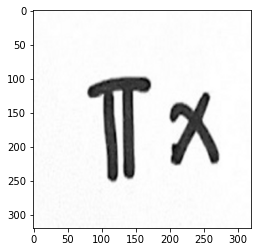

Label:  67
         xmin        ymin        xmax        ymax  confidence  class     name
1   80.321831   97.761078  175.854828  250.448883    0.649852      7  product
0  201.180847  116.378326  272.545502  229.945740    0.867905      0        x
Number of predictions:  2 Prediction:  70


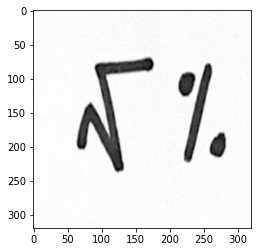

Label:  629
         xmin       ymin        xmax        ymax  confidence  class  \
1   64.546463  69.711578  189.725800  236.041168    0.847249      1   
0  213.872620  78.250000  281.769135  222.924133    0.895878      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


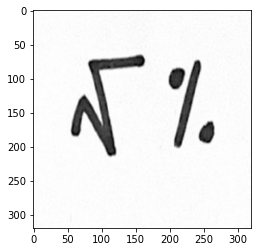

Label:  80
         xmin       ymin        xmax        ymax  confidence  class  \
1   56.493885  66.650238  162.660797  213.111603    0.877895      1   
0  199.950317  73.446960  265.292389  200.577271    0.902703      5   

          name  
1  square root  
0      percent  
Number of predictions:  2 Prediction:  15


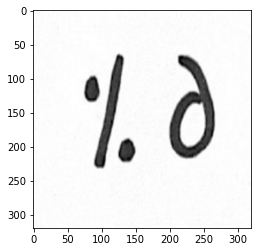

Label:  354
         xmin       ymin        xmax        ymax  confidence  class     name
0   75.673843  67.633026  148.335815  230.017761    0.932833      5  percent
1  200.697144  65.458321  266.382294  218.319366    0.873866      6  partial
Number of predictions:  2 Prediction:  56


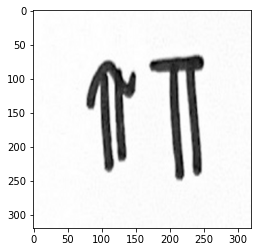

Label:  738
        xmin       ymin        xmax        ymax  confidence  class name
0  75.522415  69.670746  244.086563  245.131348    0.692681      8   pi
1  78.106964  73.021271  150.180466  235.774200    0.617170      8   pi
Number of predictions:  2 Prediction:  88


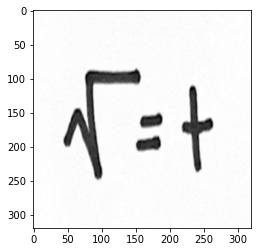

Label:  56
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.834503   85.267601  158.468201  247.130402    0.365209      1   
0  221.264893  110.950638  264.054474  236.570602    0.737625      2   

          name  
1  square root  
0    plus sign  
Number of predictions:  2 Prediction:  12


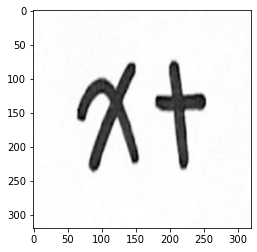

Label:  56
         xmin       ymin        xmax        ymax  confidence  class       name
1   65.169891  75.418808  155.775986  237.247177    0.668356      0          x
0  180.297852  73.039833  253.910034  233.343689    0.858197      2  plus sign
Number of predictions:  2 Prediction:  02


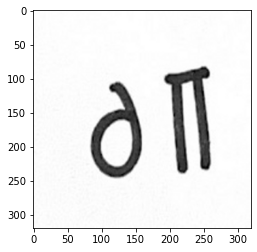

Label:  632
         xmin        ymin        xmax        ymax  confidence  class     name
0   85.031357  105.034737  158.839203  244.872681    0.542506      6  partial
2   85.332230   83.729126  264.651245  244.740814    0.272988      8       pi
1  193.846497   83.178177  260.787323  237.861252    0.490392      7  product
Number of predictions:  3 Prediction:  687


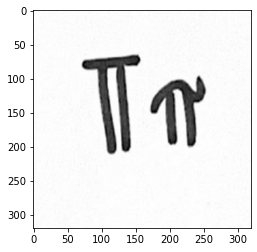

Label:  52
        xmin       ymin        xmax        ymax  confidence  class name
0  72.793625  65.578026  252.382523  208.311432    0.913475      8   pi
Number of predictions:  1 Prediction:  8


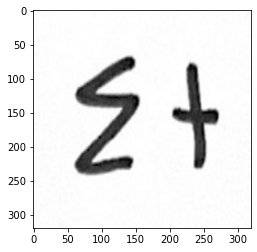

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
1   60.348614  67.591286  155.828293  240.671661    0.933356      9  summation
0  205.374603  77.599213  272.097076  231.426117    0.949153      2  plus sign
Number of predictions:  2 Prediction:  92


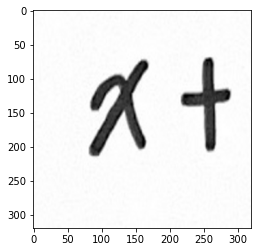

Label:  24
         xmin       ymin        xmax        ymax  confidence  class       name
1   83.472237  73.446129  169.310089  213.276978    0.933458      0          x
0  217.780136  69.369621  289.113586  206.582153    0.955493      2  plus sign
Number of predictions:  2 Prediction:  02


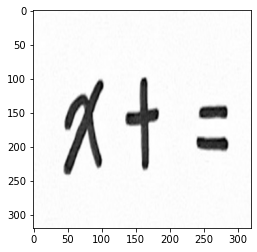

Label:  1
         xmin        ymin        xmax        ymax  confidence  class  \
2   45.814438  102.527870  103.143234  240.639557    0.824393      0   
1  136.243484   99.176414  184.580734  233.198578    0.844344      2   
0  240.910019  140.321762  287.348602  205.204239    0.917070      4   

        name  
2          x  
1  plus sign  
0      equal  
Number of predictions:  3 Prediction:  024


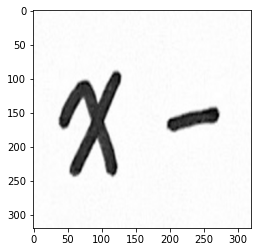

Label:  743
         xmin        ymin        xmax        ymax  confidence  class  \
0   38.090572   89.075897  129.281464  243.706024    0.933904      0   
1  197.417419  142.871933  272.886414  177.037613    0.792906      3   

            name  
0              x  
1  negative sign  
Number of predictions:  2 Prediction:  03


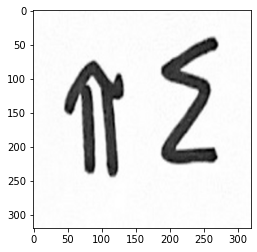

Label:  524
         xmin       ymin        xmax        ymax  confidence  class       name
1   45.427067  75.355232  133.357269  241.732605    0.776164      8         pi
0  186.616272  40.659355  271.957611  225.560394    0.895563      9  summation
Number of predictions:  2 Prediction:  89


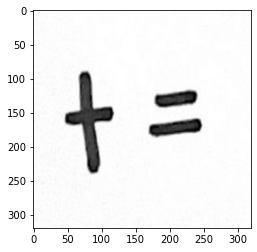

Label:  24
         xmin        ymin        xmax        ymax  confidence  class  \
0   46.806686   90.593590  118.028610  238.228485    0.934176      2   
1  170.717422  117.501892  247.363571  184.618622    0.929368      4   

        name  
0  plus sign  
1      equal  
Number of predictions:  2 Prediction:  24


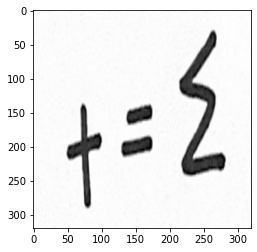

Label:  763
         xmin        ymin        xmax        ymax  confidence  class  \
0   50.017426  138.147400   98.705017  289.436096    0.797123      2   
2  131.347260  139.293518  175.167542  214.995270    0.307572      4   
1  136.363617   29.638573  284.141937  242.535553    0.548439      9   

        name  
0  plus sign  
2      equal  
1  summation  
Number of predictions:  3 Prediction:  249


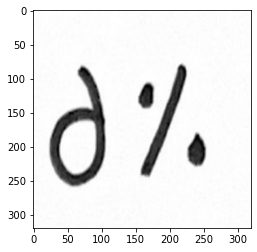

Label:  20
         xmin       ymin        xmax        ymax  confidence  class     name
2   21.951385  80.066437  252.307251  256.875641    0.356579      5  percent
1   25.279350  83.095421  104.812355  255.831665    0.723227      6  partial
0  155.545166  80.156349  252.904022  243.904022    0.922427      5  percent
Number of predictions:  3 Prediction:  565


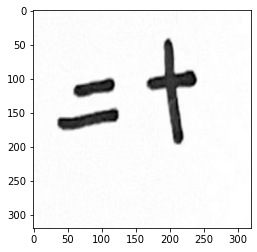

Label:  95
         xmin        ymin        xmax        ymax  confidence  class  \
1   36.277222  101.276932  124.529358  174.720749    0.894661      4   
0  167.462479   41.697945  239.791580  195.321014    0.928175      2   

        name  
1      equal  
0  plus sign  
Number of predictions:  2 Prediction:  42


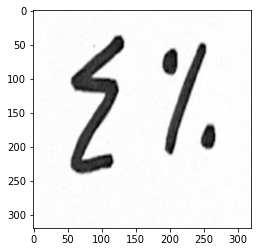

Label:  72
         xmin       ymin        xmax        ymax  confidence  class       name
1   54.743484  37.967522  132.771591  236.799500    0.842668      9  summation
0  189.343277  49.043846  266.583252  210.803497    0.923798      5    percent
Number of predictions:  2 Prediction:  95


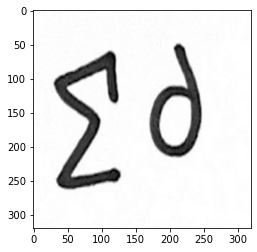

Label:  92
         xmin       ymin        xmax        ymax  confidence  class       name
0   29.309792  60.105042  127.421043  261.437286    0.946987      9  summation
1  173.587006  49.153244  246.858185  214.583755    0.894475      6    partial
Number of predictions:  2 Prediction:  96


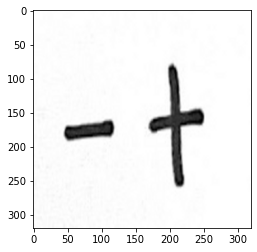

Label:  87
         xmin        ymin        xmax        ymax  confidence  class  \
1   45.780361  161.792191  116.560333  190.770401    0.589536      3   
0  170.311035   82.001671  250.109589  259.833527    0.928093      2   

            name  
1  negative sign  
0      plus sign  
Number of predictions:  2 Prediction:  32


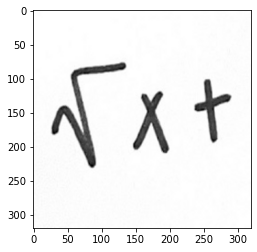

Label:  23
         xmin        ymin        xmax        ymax  confidence  class  \
1   27.674599   76.120071  132.863281  230.386276    0.891948      1   
2  148.754425  118.806931  198.617279  208.797867    0.864606      0   
0  237.440140  101.412773  289.803040  199.697113    0.913750      2   

          name  
1  square root  
2            x  
0    plus sign  
Number of predictions:  3 Prediction:  102


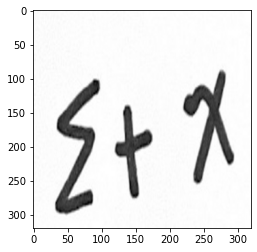

Label:  34
         xmin        ymin        xmax        ymax  confidence  class name
1   32.273369  101.968124  176.966736  294.890320    0.284343      8   pi
0  220.781952   87.836365  294.596710  253.959595    0.920840      0    x
Number of predictions:  2 Prediction:  80


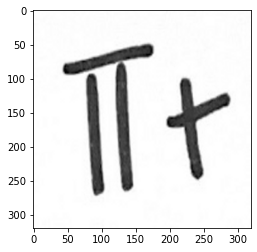

Label:  786
         xmin       ymin        xmax        ymax  confidence  class       name
1   43.884209  48.801521  174.587097  269.623566    0.453678      7    product
0  195.701950  99.222954  288.889587  248.842926    0.666631      2  plus sign
Number of predictions:  2 Prediction:  72


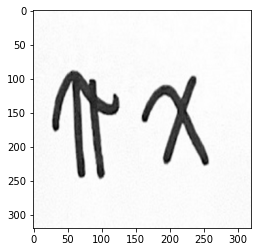

Label:  56
         xmin       ymin        xmax        ymax  confidence  class name
2   27.237930  88.344704  251.670944  245.301636    0.356049      8   pi
1   28.021675  89.021957  125.803108  245.804611    0.780275      8   pi
0  161.516632  97.019478  257.997681  228.253387    0.899660      0    x
Number of predictions:  3 Prediction:  880


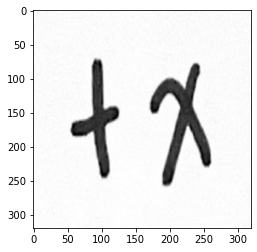

Label:  24
         xmin       ymin        xmax        ymax  confidence  class       name
1   55.379566  72.206215  125.854874  246.573578    0.870706      2  plus sign
0  172.470840  77.336647  260.664917  257.317993    0.939078      0          x
Number of predictions:  2 Prediction:  20


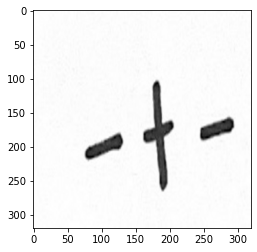

Label:  61
        xmin        ymin        xmax        ymax  confidence  class       name
0  75.358078  103.297974  294.853088  264.793884    0.925517      2  plus sign
Number of predictions:  1 Prediction:  2


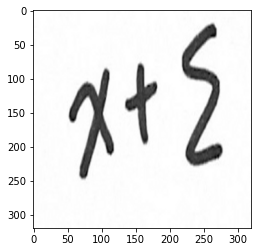

Label:  42
        xmin       ymin        xmax        ymax  confidence  class name
0  52.094032  79.266586  174.504456  246.728928    0.757634      0    x
Number of predictions:  1 Prediction:  0


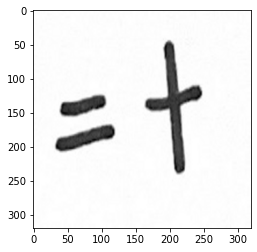

Label:  124
         xmin        ymin        xmax        ymax  confidence  class  \
0   32.625362  124.401466  118.776825  206.116058    0.919659      4   
1  164.580307   47.833267  247.589066  234.951309    0.916874      2   

        name  
0      equal  
1  plus sign  
Number of predictions:  2 Prediction:  42


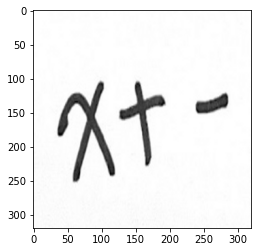

Label:  4
         xmin        ymin        xmax        ymax  confidence  class  \
0   36.076096  103.340378  192.999313  251.476242    0.893867      0   
1  238.494125  121.949387  286.274689  151.116562    0.449487      3   
2  240.381256  119.862907  286.429291  154.686234    0.332972      2   

            name  
0              x  
1  negative sign  
2      plus sign  
Number of predictions:  3 Prediction:  032


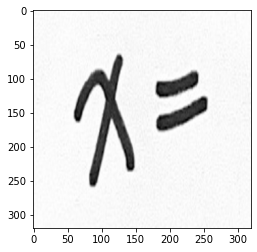

Label:  3
         xmin       ymin        xmax        ymax  confidence  class   name
0   60.283451  64.893524  148.207291  257.327148    0.815879      0      x
1  180.524353  89.052231  255.985016  176.112717    0.784551      4  equal
Number of predictions:  2 Prediction:  04


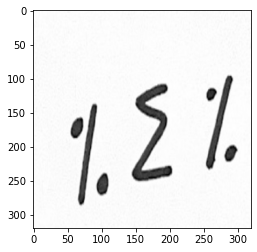

Label:  215
         xmin        ymin        xmax        ymax  confidence  class  \
1   54.508446  137.060638  108.259087  285.150940    0.902008      5   
2  147.792206  108.164337  202.091034  254.212921    0.509351      9   
0  253.054718   96.298912  297.821014  235.101410    0.911731      5   

        name  
1    percent  
2  summation  
0    percent  
Number of predictions:  3 Prediction:  595


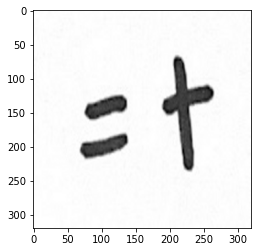

Label:  15
         xmin        ymin        xmax        ymax  confidence  class  \
1   68.948349  125.575943  137.749741  217.678207    0.885082      4   
0  190.051819   67.139023  264.596344  234.687759    0.912722      2   

        name  
1      equal  
0  plus sign  
Number of predictions:  2 Prediction:  42


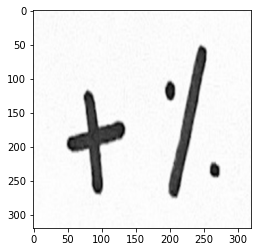

Label:  95
         xmin        ymin        xmax        ymax  confidence  class  \
1   49.591122  118.132805  133.783432  269.833313    0.896380      2   
0  193.288757   51.455757  273.052368  273.732208    0.922996      5   

        name  
1  plus sign  
0    percent  
Number of predictions:  2 Prediction:  25


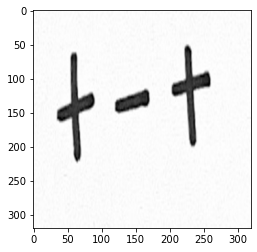

Label:  210
         xmin       ymin        xmax        ymax  confidence  class       name
2   30.953140  56.053925  263.608582  221.490265    0.277976      2  plus sign
1   33.589462  62.291893  103.114532  222.632599    0.698346      2  plus sign
0  205.275528  51.408226  260.037811  198.947968    0.877087      2  plus sign
Number of predictions:  3 Prediction:  222


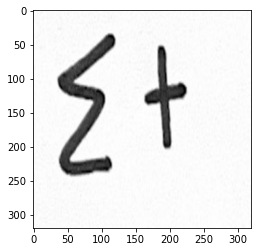

Label:  95
         xmin       ymin        xmax        ymax  confidence  class       name
1   34.682152  35.269287  125.216743  240.769287    0.705411      9  summation
0  163.934708  52.048996  224.776382  201.985611    0.910467      2  plus sign
Number of predictions:  2 Prediction:  92


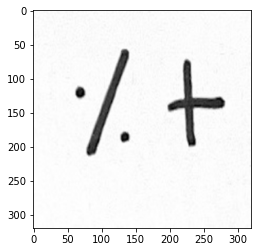

Label:  35
         xmin       ymin        xmax        ymax  confidence  class       name
0   61.879410  58.205551  140.738541  212.422836    0.949692      5    percent
1  198.460236  72.921669  281.435150  199.349731    0.930540      2  plus sign
Number of predictions:  2 Prediction:  52


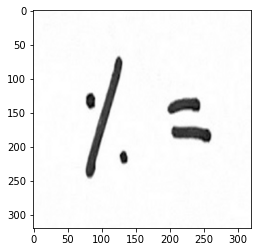

Label:  32
         xmin        ymin        xmax        ymax  confidence  class     name
0   76.674744   68.469925  137.172806  245.799728    0.922156      5  percent
1  197.324936  129.532059  261.066010  193.405960    0.909548      4    equal
Number of predictions:  2 Prediction:  54


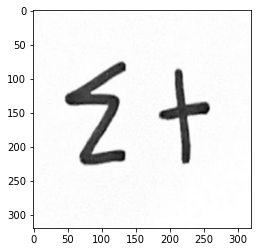

Label:  972
         xmin       ymin        xmax        ymax  confidence  class       name
1   47.010742  75.653023  136.160980  225.862030    0.938741      9  summation
0  185.774185  85.692734  259.145325  225.691147    0.955918      2  plus sign
Number of predictions:  2 Prediction:  92


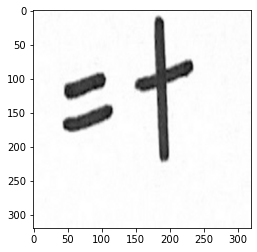

Label:  32
         xmin       ymin        xmax        ymax  confidence  class       name
1   43.500229  91.513077  116.239258  177.029404    0.847782      4      equal
0  149.400314   9.836685  234.278549  219.566574    0.860165      2  plus sign
Number of predictions:  2 Prediction:  42


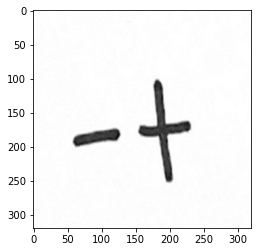

Label:  65
         xmin        ymin        xmax        ymax  confidence  class  \
1   58.225662  101.671204  233.713882  251.521027    0.764160      2   
0  155.844086  102.589966  231.385223  251.918976    0.797932      2   

        name  
1  plus sign  
0  plus sign  
Number of predictions:  2 Prediction:  22


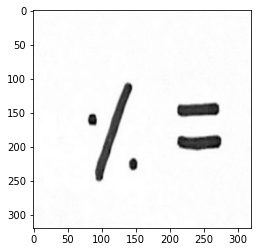

Label:  320
         xmin        ymin        xmax        ymax  confidence  class     name
0   81.158638  106.808441  152.023102  250.968414    0.948383      5  percent
1  211.585754  136.269836  276.192322  204.060059    0.914196      4    equal
Number of predictions:  2 Prediction:  54


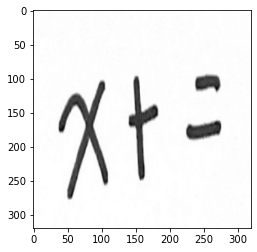

Label:  92
         xmin       ymin        xmax        ymax  confidence  class   name
1   41.997879  99.868828  143.747452  276.803680    0.740815      0      x
0  226.695282  95.483337  275.965790  189.814575    0.884922      4  equal
Number of predictions:  2 Prediction:  04
Acc: 0.0712
Testing complete in 0m 22s


(AutoShape(
   (model): DetectMultiBackend(
     (model): DetectionModel(
       (model): Sequential(
         (0): Conv(
           (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
           (act): SiLU(inplace=True)
         )
         (1): Conv(
           (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
           (act): SiLU(inplace=True)
         )
         (2): C3(
           (cv1): Conv(
             (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (cv2): Conv(
             (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (cv3): Conv(
             (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
             (act): SiLU(inplace=True)
           )
           (m): Sequential(
             (0): Bottleneck(
               (cv1): Conv(
                 (conv): Conv2d(32, 32, kernel_s

In [97]:
test_model(model_ft, dataset, labels)

In [40]:
dataset = [os.path.join(preceding_path, image) for image in sorted(os.listdir(preceding_path))]
dataset_merge = np.zeros((300, 300, len(dataset)))
for idx in range(len(dataset)):
    dataset_merge[:, :, idx] = np.array(Image.open(dataset[idx]).convert('L').resize((300, 300)))
np.save('dataset_merge.npy', dataset_merge)

In [79]:
labels_merge = np.load('labels_merge.npy')
labels_merge_str = np.zeros(len(labels_merge), dtype=object)
for i in range(len(labels_merge)):
    labels_merge_str[i] = str(int(labels_merge[i]))
np.save('labels_merge.npy', labels_merge_str)

In [98]:
labels_merge

array([ 21, 941,  15, 423, 223, 567, 551, 210, 543,  21, 210, 805, 421, 953, 754, 864, 492, 102, 321, 891, 643, 942, 443, 253,  51, 524, 209,  70, 389, 432, 242,  23, 120, 132, 567, 598, 876, 967, 856,  74, 624,   1,   2,  87,  96,   2,  95,  58, 523,  32, 865,  93,  52,  61,  25, 423, 423,  24, 728,   4, 325, 249,
        42, 249,  32,  15,  23, 223, 153, 405, 243,  23,  57,  42,  54,  54,  92, 956,  15,  78, 650, 624,  42, 142, 865,  23,  13, 925,  48,  43,  95, 264, 532, 323,  89,  72, 424,  34,  42, 967,   3,  54,   4, 843, 232, 595,  76,  65,  29, 102, 920,  70, 764, 943,  54,   3, 232,  67, 629,  80, 354, 738,  56,  56,
       632,  52,  92,  24,   1, 743, 524,  24, 763,  20,  95,  72,  92,  87,  23,  34, 786,  56,  24,  61,  42, 124,   4,   3, 215,  15,  95, 210,  95,  35,  32, 972,  32,  65, 320,  92], dtype=int64)